In [2]:
import matplotlib.pyplot as plt
import classy_sz
import pyccl as ccl
import numpy as np

font = {'size'   : 16, 'family':'STIXGeneral'}
plt.rcParams.update({
     "text.usetex": True,
     "font.family": "serif",
     "font.sans-serif": ['Computer Modern']})
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})

In [21]:
freq1=143
freq2=217
freq3=353

nu_list = np.asarray([freq1, freq2])
nu_list_str = str(freq1)+","+str(freq2)
# nu_list = 217,353,545
# nu_list_str = '217,353,545'


In [24]:
path_to_class_sz = "/Users/aleksandra/software/ILC/ILC_class-sz_curves/websky-10-23-moto/"

ell_cib_g, cib_g1 = np.loadtxt(path_to_class_sz + "ell_dl_"+str(freq1)+"x"+str(freq1)+"_GHz_CIBxg_green.txt")
ell_cib_g, cib_g2 = np.loadtxt(path_to_class_sz + "ell_dl_"+str(freq2)+"x"+str(freq2)+"_GHz_CIBxg_green.txt")
ell_cib_g, cib_g3 = np.loadtxt(path_to_class_sz + "ell_dl_"+str(freq3)+"x"+str(freq3)+"_GHz_CIBxg_green.txt")

ell_cib, cib1 = np.loadtxt(path_to_class_sz + "ell_dl_"+str(freq1)+"x"+str(freq1)+"_GHz_CIBxCIB.txt")
ell_cib, cib2 = np.loadtxt(path_to_class_sz + "ell_dl_"+str(freq2)+"x"+str(freq2)+"_GHz_CIBxCIB.txt")
ell_cib, cib3 = np.loadtxt(path_to_class_sz + "ell_dl_"+str(freq3)+"x"+str(freq3)+"_GHz_CIBxCIB.txt")

ell_gg, gg = np.loadtxt(path_to_class_sz + "ell_dl_gg_green.txt")


In [28]:
r1 = cib_g1 /np.sqrt(gg*cib1)
r2 = cib_g2 /np.sqrt(gg*cib2)
r3 = cib_g3 /np.sqrt(gg*cib3)

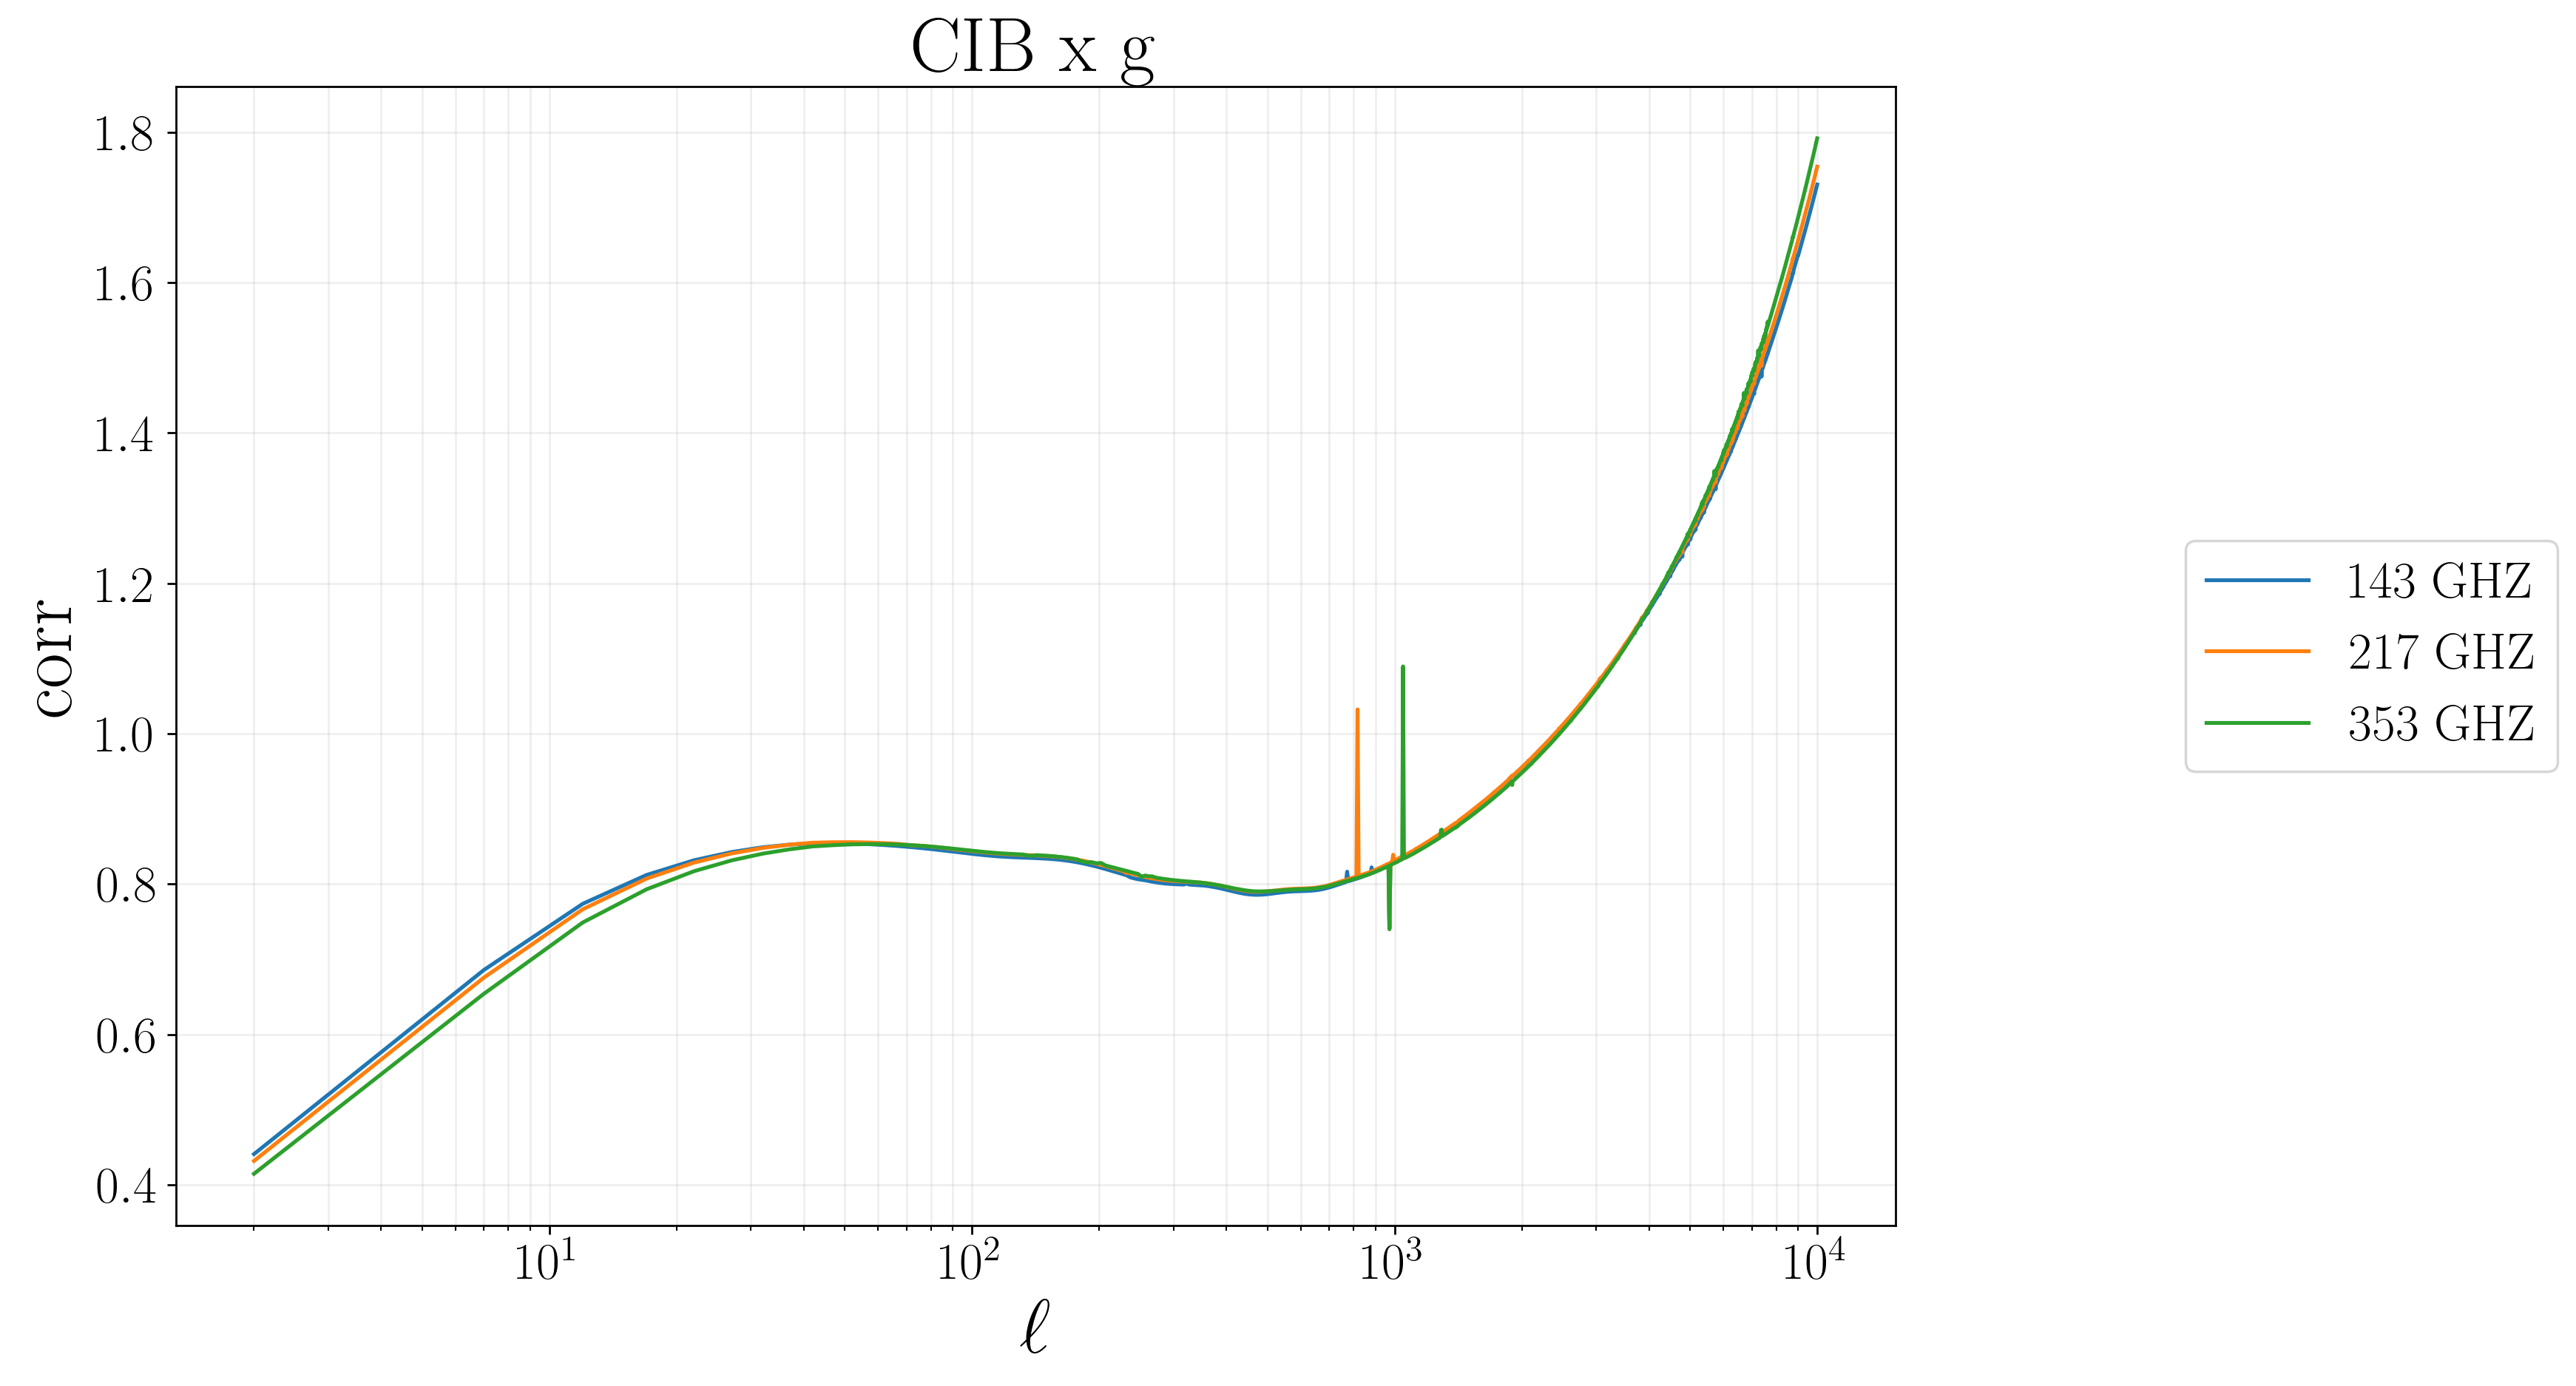

In [31]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('CIB x g', fontsize=30)
plt.xscale('log')
 
plt.plot(ell_cib, r1, label = "%.1i GHZ"%(freq1))
plt.plot(ell_cib, r2, label = "%.1i GHZ"%(freq2))
plt.plot(ell_cib, r3, label = "%.1i GHZ"%(freq3))
            
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


In [8]:
def convert_Jysr_to_uK(nu_in_GHz):
    #or MJysr to K
    # Appendix A of Fionas paper https://arxiv.org/pdf/2010.16405.pdf
    x = nu_in_GHz/56.233
    dB_Jy = 968*np.exp(x)*(nu_in_GHz/100)**4/(np.exp(x)-1)**2
    return dB_Jy

def tSZ_spectral_funct_at_nu_in_GHz(nu_in_GHz):
        T_cmb = 2.726
        frequency_in_Hz = nu_in_GHz*1e9
        Tcmb_gNU = T_cmb*((_h_P_*frequency_in_Hz/(_k_B_*T_cmb))*(1./np.tanh((_h_P_*frequency_in_Hz/(_k_B_*T_cmb))/2.))-4.)
#         print("Tcmb_gNU=", Tcmb_gNU)
#         print("for", nu_in_GHz, "GHz")
        return Tcmb_gNU


# websky data

In [9]:
path_ps = "/Users/aleksandra/software/ILC/websky_PS/"

# in MJy2/sr
# 
ws_cib145 = np.loadtxt(path_ps+"websky_CIBxCIB_145_MJy2sr_healpy_4096_ellmax5001.txt")
ws_cib217 = np.loadtxt(path_ps+"websky_CIBxCIB_217_MJy2sr_healpy_4096_ellmax5001.txt")
ws_cib353 = np.loadtxt(path_ps+"websky_CIBxCIB_353_MJy2sr_healpy_4096_ellmax5001.txt")
ws_cib545 = np.loadtxt(path_ps+"websky_CIBxCIB_545_MJy2sr_healpy_4096_ellmax5001.txt")
#in MJy/sr
ws_ycib217 = np.loadtxt(path_ps+"websky_yxCIB_217_MJysr_healpy_4096_ellmax5001.txt")
ws_ycib353 = np.loadtxt(path_ps+"websky_yxCIB_353_MJysr_healpy_4096_ellmax5001.txt")
ws_ycib545 = np.loadtxt(path_ps+"websky_yxCIB_545_MJysr_healpy_4096_ellmax5001.txt")

ws_yy = np.loadtxt(path_ps+"websky_yy_4096_ellmax5001.txt")


ell_websky=np.arange(1, len(ws_ycib217)+1, 1)
cl_to_dl_ws= ell_websky*(ell_websky+1)/2/np.pi

In [10]:
ws_cib145_test = np.loadtxt(path_ps+"test_websky_CIBxCIB_145_MJy2sr_healpy_4096_ellmax5001.txt")
len(ws_cib145_test)

12288

# tSZ

NameError: name 'ells_ccl' is not defined

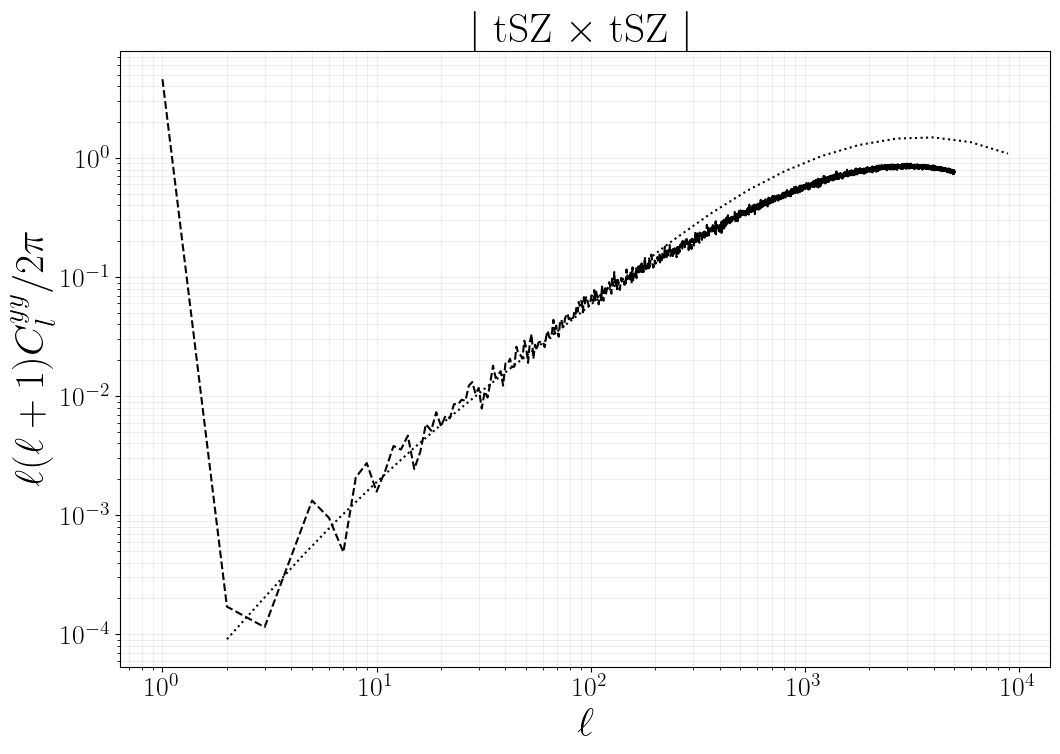

In [12]:
plt.figure(figsize=(12,8))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title("$|$ tSZ $\\times$ tSZ $|$", fontsize=30)
plt.xlabel('$\ell$',fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l^{yy} / 2 \pi \,\,\, $", size=30)
plt.grid(which='both',alpha=0.2)

yy = np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h'])
plt.loglog(cl_sz['ell'],yy,":",color="black", label=r'yy')
plt.loglog(ell_websky, 10**12 * ws_yy*cl_to_dl_ws,"--",color="black", label=r'websky, yy')
plt.loglog(ells_ccl, cl_ccl['y-y'],"-",color="red", label=r'ccl')

# for (i,nu) in enumerate(nu_list):
#     plt.loglog(cl_sz['ell'],yy*abs(tSZ_spectral_funct_at_nu_in_GHz(nu)**2),label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

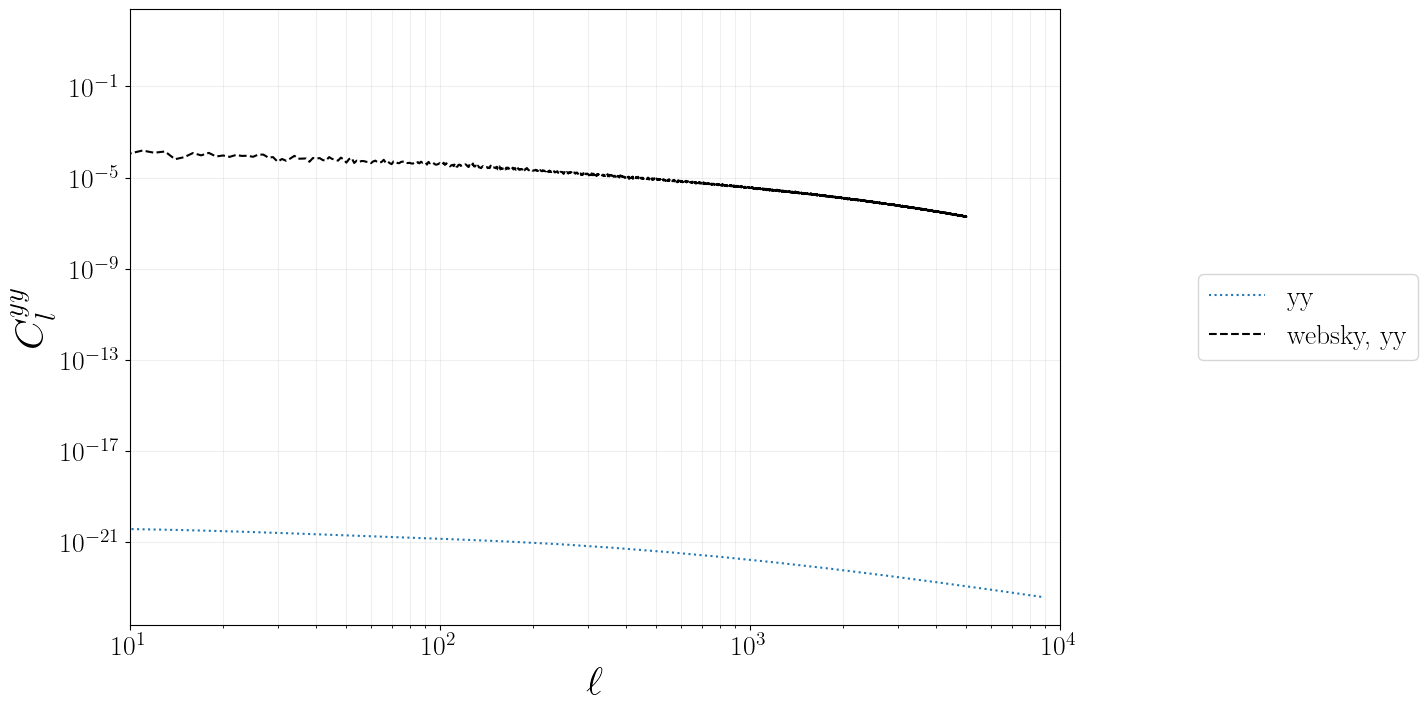

In [74]:
plt.figure(figsize=(12,8))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#plt.title("$|$ tSZ $\\times$ tSZ $|$ in $Jy^2/sr$", fontsize=30)
plt.xlabel('$\ell$',fontsize=30)
plt.ylabel(r"$  C_l^{yy}  \,\,\,$", size=30)
plt.grid(which='both',alpha=0.2)
plt.xlim(10, 10000) 

ell_yy = np.asarray(cl_sz['ell'])
cls_to_dls = ell_yy*(ell_yy+1.)/2./np.pi

yy = np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h'])
plt.loglog(cl_sz['ell'],yy/cls_to_dls,":", label=r'yy')
plt.loglog(10**12 * ws_yy,"--",color="black", label=r'websky, yy')
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


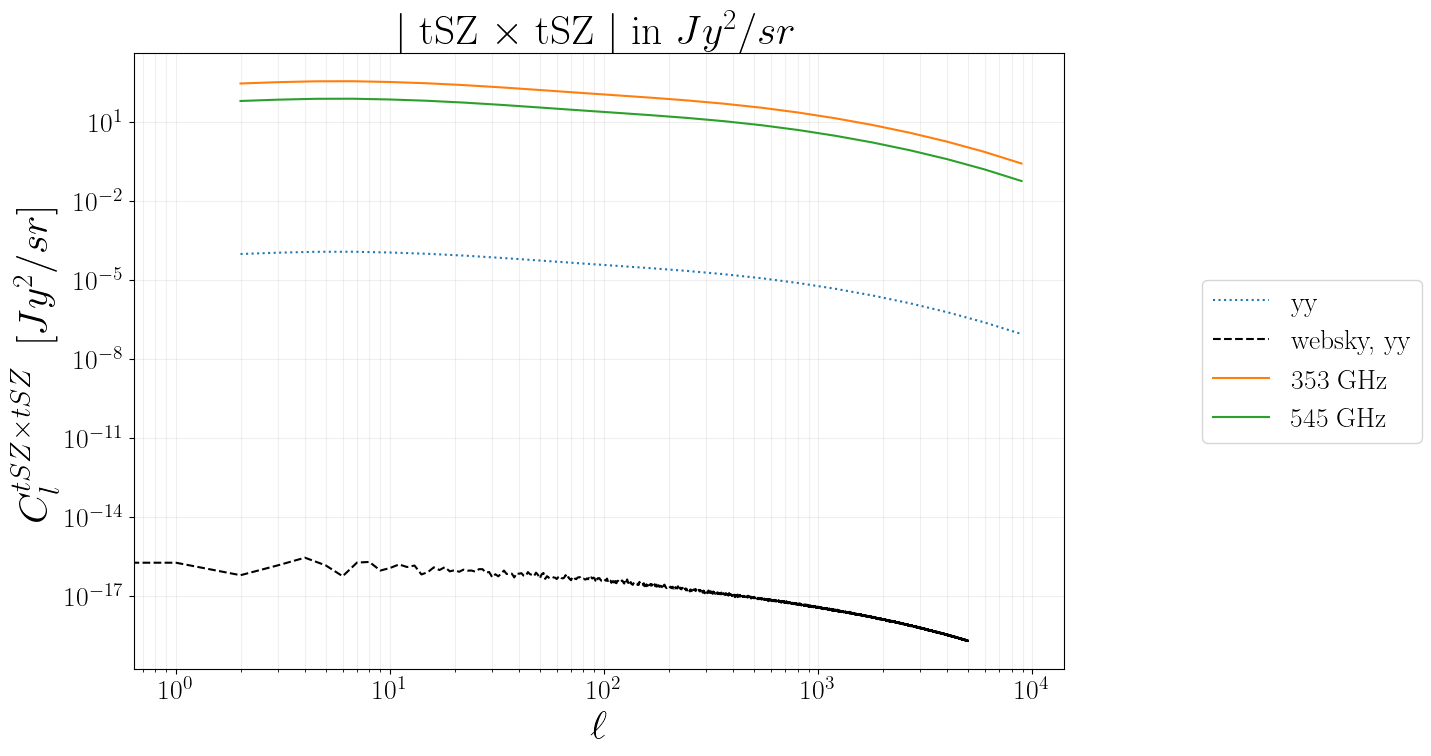

In [14]:
plt.figure(figsize=(12,8))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title("$|$ tSZ $\\times$ tSZ $|$ in $Jy^2/sr$", fontsize=30)
plt.xlabel('$\ell$',fontsize=30)
plt.ylabel(r"$  C_l^{tSZ \times tSZ}  \,\,\, [Jy^2/sr]$", size=30)
plt.grid(which='both',alpha=0.2)

ell_yy = np.asarray(cl_sz['ell'])
cls_to_dls = ell_yy*(ell_yy+1.)/2./np.pi

yy = np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h'])
plt.loglog(cl_sz['ell'],yy/cls_to_dls,":", label=r'yy')
plt.loglog(ws_yy,"--",color="black", label=r'websky, yy')

for (i,nu) in enumerate(nu_list):
    plt.loglog(cl_sz['ell'],yy*abs(tSZ_spectral_funct_at_nu_in_GHz(nu)**2)*convert_Jysr_to_uK(nu)**2/cls_to_dls,label=r'%.1i GHz'%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## compare websky and ccl 

In [15]:
p_dict = {}


# 'M500' is Tinker et al 2008 @ M500
# 'T10' is Tinker et al 2010 @ m200_mean

p_dict['mass function'] = 'T10'
p_dict['concentration parameter'] = 'D08'
p_dict['delta for cib'] = '200m'
p_dict['hm_consistency'] = 1
p_dict['damping_1h_term'] = 0

# parameters for Cosmology
p_dict['Omega_cdm'] = 0.3175-0.022068/0.6711/0.6711
p_dict['omega_b'] = 0.022068
p_dict['h'] = 0.6711
p_dict['A_s'] = 2.2e-9
p_dict['n_s'] = .9624
p_dict['k_pivot'] = 0.05


p_dict['N_ncdm'] = 1
p_dict['N_ur'] = 0.00641
p_dict['deg_ncdm'] = 3
p_dict['m_ncdm'] = 0.02
p_dict['T_ncdm'] = 0.71611


# mass bounds
p_dict['M_min'] = 1e8*p_dict['h']
p_dict['M_max'] = 1e16*p_dict['h']

# redshift bounds
p_dict['z_min'] = 0.07
p_dict['z_max'] = 6. # fiducial for MM20 : 6

p_dict['freq_min'] = 10.
p_dict['freq_max'] = 5e4 # fiducial for MM20 : 6

# HOD parameters for CIB
p_dict['M_min_HOD'] = pow(10.,10)
p_dict['M1_prime_HOD'] =pow(10.,12.51536196)*p_dict['h']


# CIB parametes see McCarthy & Madhavacheril 2020
p_dict['Redshift evolution of dust temperature'] =  0.36
p_dict['Dust temperature today in Kelvins'] = 24.4
p_dict['Emissivity index of sed'] = 1.75
p_dict['Power law index of SED at high frequency'] = 1.7
p_dict['Redshift evolution of L − M normalisation'] = 3.6
p_dict['Most efficient halo mass in Msun'] = pow(10.,12.6)
p_dict['Normalisation of L − M relation in [Jy MPc2/Msun]'] = 6.4e-8
p_dict['Size of of halo masses sourcing CIB emission'] = 0.5
p_dict['has_cib_flux_cut'] = 1
#     p_dict['cib_frequency_list_num'] = len(nu_list),
#     p_dict['cib_frequency_list_in_GHz'] = nu_list_str,  
# List of frequency bands for cib
if freq_cib_1 == freq_cib_2:
    p_dict['cib_frequency_list_num'] = 1
    p_dict['cib_frequency_list_in_GHz'] = str(freq_cib_1)
    p_dict['cib_Snu_cutoff_list [mJy]'] = str(cib_Snu_1)
    # p_dict['cib_frequency_list_num'] = 5
    # p_dict['cib_frequency_list_in_GHz'] = '217,353,545,857,3000'
    p_dict["Frequency_id nu for cib in GHz (to save in file)"] = 0
    p_dict["Frequency_id nu^prime for cib in GHz (to save in file)"] = 0

else:
    p_dict['cib_frequency_list_num'] = 2
    p_dict['cib_frequency_list_in_GHz'] = str(freq_cib_1)+','+str(freq_cib_2)
    p_dict['cib_Snu_cutoff_list [mJy]'] = str(cib_Snu_1)+','+str(cib_Snu_2)
    # p_dict['cib_frequency_list_num'] = 5
    # p_dict['cib_frequency_list_in_GHz'] = '217,353,545,857,3000'
    p_dict["Frequency_id nu for cib in GHz (to save in file)"] = 0
    p_dict["Frequency_id nu^prime for cib in GHz (to save in file)"] = 1
# verbose paramete of class_sz
p_dict['class_sz_verbose'] = 2
p_dict['root'] = 'sz_auxiliary_files/run_scripts/tmp/class-sz_tmp_'
p_dict['write sz results to files'] = 'yes' # this writes  PS and f(z)
# precision parameters
p_dict['pressure_profile_epsabs'] = 1.e-8
p_dict['pressure_profile_epsrel'] = 1.e-3
# precision for redshift integal
p_dict['redshift_epsabs'] = 1e-40#1.e-40
p_dict['redshift_epsrel'] = 1e-4#1.e-10 # fiducial value 1e-8
# precision for mass integal
p_dict['mass_epsabs'] = 1e-40 #1.e-40
p_dict['mass_epsrel'] = 1e-4#1e-10
# precision for Luminosity integral (sub-halo mass function)
p_dict['L_sat_epsabs'] = 1e-40 #1.e-40
p_dict['L_sat_epsrel'] = 1e-3#1e-10


p_dict['z_max_pk'] = p_dict['z_max']

# multipole array
p_dict['dlogell'] = 0.4
p_dict['ell_max'] = 5000.
p_dict['ell_min'] = 2.


freq_cib_1

353

# CIB 

In [16]:
# plt.figure(figsize=(12,8))
# plt.xlabel(r"$\ell$", size=30)
# plt.ylabel(r"$\ell (\ell+1) C_l^{\nu \nu} / 2 \pi \,\,\, [Jy^2/sr]$", size=30)
# plt.yticks(fontsize=30)
# plt.xticks(fontsize=30)
# plt.title(r'CIB $\times$ CIB', fontsize=30)
# plt.grid(which='both',alpha=0.2)
# plt.yscale("log")
# plt.xscale("log")

# for (i,nu) in enumerate(nu_list):
#     #CIB
#     ell_cib = cl_cib_cib[str(nu)+'x'+str(nu)]['ell']
#     dls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])
#     dls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])

#     plt.plot(ell_cib, dls_cib_1h + dls_cib_2h, label=r' %.1i'%(nu))
#     plt.plot(ell_cib, dls_cib_1h,"--",  label=r' %.1i, 1h'%(nu))
#     plt.plot(ell_cib, dls_cib_2h, ":", label=r' %.1i, 2h'%(nu))

# plt.legend(loc='right',  fontsize=20)    
  

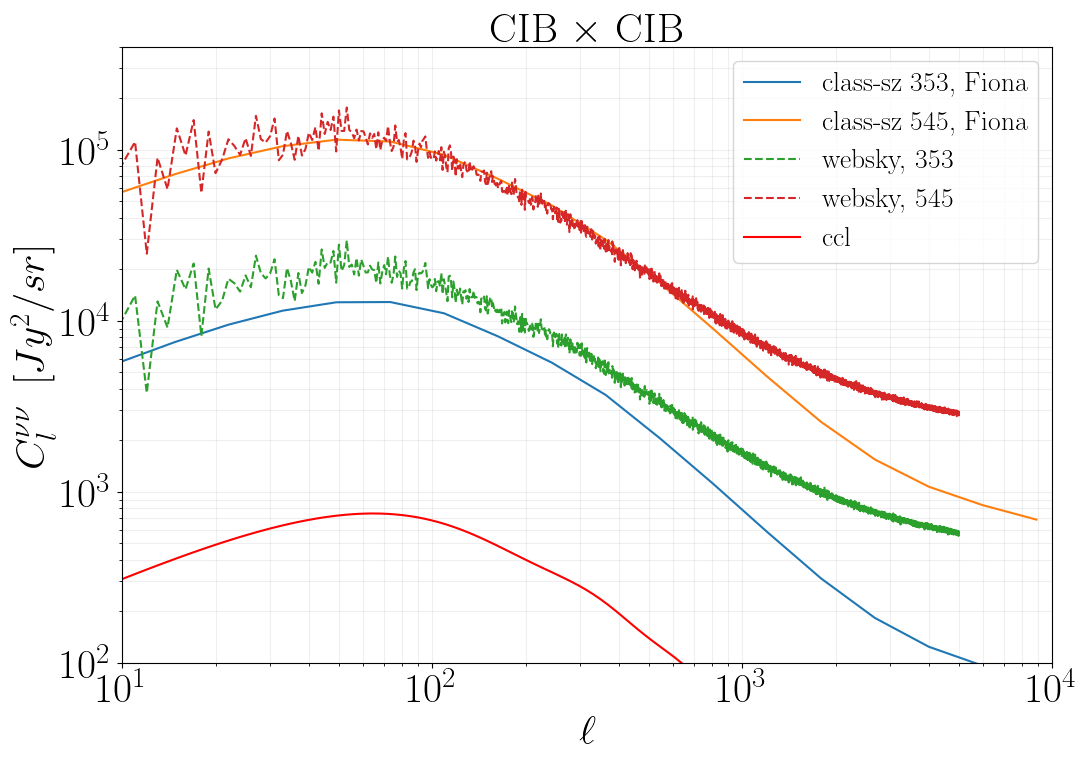

In [28]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$C_l^{\nu \nu} \,\,\, [Jy^2/sr]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'CIB $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")
plt.xlim(10, 10000)
plt.ylim(100, 4*1e5)

for (i,nu) in enumerate(nu_list[:3]):
    #CIB
    ell_cib = np.asarray(cl_cib_cib[str(nu)+'x'+str(nu)]['ell'])
    cls_to_dls = ell_cib*(ell_cib+1)/2/np.pi
    dls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])
    dls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    plt.plot(ell_cib, (dls_cib_1h + dls_cib_2h)/cls_to_dls, label=r'class-sz %.1i, Fiona'%(nu))

#websky
#plt.plot(1e12*ws_cib217, "--", label=r'websky, 217')
plt.plot(1e12*ws_cib353, "--", label=r'websky, 353')
plt.plot(1e12*ws_cib545, "--", label=r'websky, 545')

#ccl
# plt.loglog(l_ccl,cl_ccl,"-",color="red", label=r'ccl')
# plt.loglog(l_ccl,cl_ccl2,"-",color="red", label=r'ccl')
plt.loglog(ells_ccl, cl_ccl['c-c'],"-",color="red", label=r'ccl')

plt.legend( fontsize=20)    
  

# tSZ x CIB

In [18]:
convert_Jysr_to_uK(217)

472.4010897987546

In [19]:
1/convert_Jysr_to_uK(217)

0.0021168452435747034

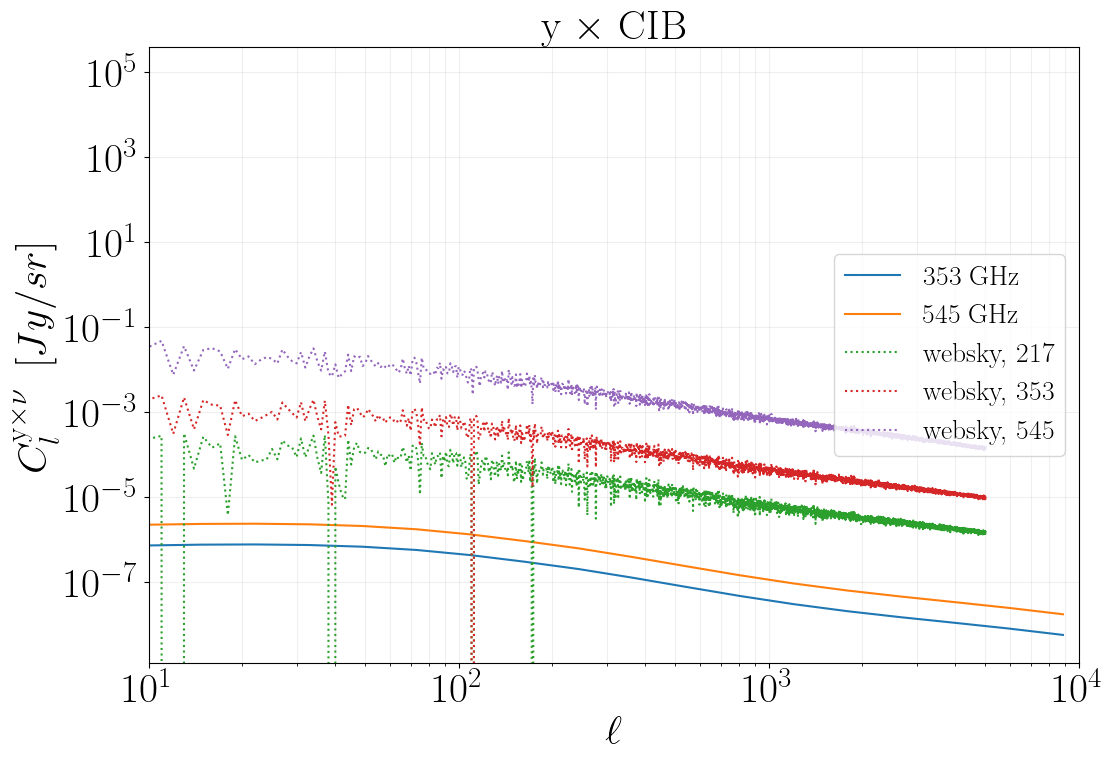

In [43]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$ C_l^{\rm{y \times \nu}} \,\,\, [Jy/sr]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'y $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")
plt.xlim(10, 10000) 

# class-sz
ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi
for (i,nu) in enumerate(nu_list):
    cl_yCIB_1h = np.asarray(cl_tsz_cib[str(nu)]['1h'])
    cl_yCIB_2h = np.asarray(cl_tsz_cib[str(nu)]['2h'])
    plt.plot(ell_tsz_cib, (cl_yCIB_1h+cl_yCIB_2h)/cls_to_dls, '-',label=r' %.1i GHz'%(nu))

#websky 1e6 for from maps(MJy) to Jensky, 1e6 for y units in class-sz
# plt.plot(1e6*ws_ycib217, ":", label=r'websky, 217')
# plt.plot(1e6*ws_ycib353, ":", label=r'websky, 353')
# plt.plot(1e6*ws_ycib545, ":", label=r'websky, 545')
plt.plot(1e12*ws_ycib217/convert_Jysr_to_uK(217), ":", label=r'websky, 217')
plt.plot(1e12*ws_ycib353/convert_Jysr_to_uK(353), ":", label=r'websky, 353')
plt.plot(1e12*ws_ycib545/convert_Jysr_to_uK(545), ":", label=r'websky, 545')


plt.legend(loc='right',  fontsize=20)    
  

## ccl tsz x cib 

In [63]:
freq_cib_CCL = freq_cib_2

cosmo = ccl.Cosmology(Omega_b=p_dict['omega_b']/p_dict['h']**2.,
                           Omega_c=p_dict['Omega_cdm'],
                           h=p_dict['h'],
                           n_s=p_dict['n_s'],
                           A_s=p_dict['A_s'],
                           Neff=3.046)
mdef = ccl.halos.MassDef200m()
cM = ccl.halos.ConcentrationDuffy08(mdef)
hmf = ccl.halos.MassFuncTinker10(cosmo, mdef, norm_all_z=True)
bM = ccl.halos.HaloBiasTinker10(cosmo, mdef)
hmc = ccl.halos.HMCalculator(cosmo, hmf, bM, mdef)


pr = ccl.halos.HaloProfileCIBShang12(cM, freq_cib_CCL, Mmin=1E10)
pr.update_parameters(nu_GHz=freq_cib_CCL,
                              alpha=0.36,
                              T0=24.4,
                              beta=1.75,
                              gamma=1.7,
                              s_z=3.6,
                              log10meff=12.6,
                              sigLM=np.sqrt(0.5),
                              Mmin=1E10,
                              L0=6.4E-8)

pr2pt = ccl.halos.Profile2ptCIB()

tracers = {}
# tSZ
tracers['y'] = ccl.tSZTracer(cosmo, z_max=4.)
# CIB
tracers['c'] = ccl.CIBTracer(cosmo, z_min=0.05)
profs = {}
# This just defines which of these tracers should be normalized (e.g. overdensities)
norm = {}
# tSZ
profs['y'] = ccl.halos.HaloProfilePressureGNFW(alpha_P=, gamx_out=6)
norm['y'] = False
# CIB
profs['c'] = ccl.halos.HaloProfileCIBShang12(cM, nu_GHz=freq_cib_CCL,
                              alpha=0.36,
                              T0=24.4,
                              beta=1.75,
                              gamma=1.7,
                              s_z=3.6,
                              log10meff=12.6,
                              sigLM=np.sqrt(0.5),
                              Mmin=1E10,
                              L0=6.4E-8)
norm['c'] = False

lk_arr = np.log(np.geomspace(1E-4, 100, 256))
a_arr = 1./(1+np.linspace(0, 6., 40)[::-1])



In [ ]:
ccl.halos.HaloProfileNFW

In [64]:
tracer_list = list(profs.keys())
profs2pt = {f'{t1}-{t2}': ccl.halos.Profile2pt() for t1 in tracer_list for t2 in tracer_list}
profs2pt['c-c'] = ccl.halos.Profile2ptCIB()
tracer_list



['y', 'c']

In [65]:

pks = {f'{t1}-{t2}': ccl.halos.halomod_Pk2D(cosmo, hmc,
                                            profs[t1],
                                            prof_2pt=profs2pt[f'{t1}-{t2}'],
                                            prof2=profs[t2],
                                            normprof1=norm[t1],
                                            normprof2=norm[t2],
                                            a_arr=a_arr,
                                            lk_arr=lk_arr)
       for t1 in tracer_list for t2 in tracer_list}

In [61]:
ells_ccl = np.unique(np.geomspace(2, 2000, 128).astype(int)).astype(float)
cl_ccl = {f'{t1}-{t2}': ccl.angular_cl(cosmo, tracers[t1], tracers[t2], ells_ccl, p_of_k_a=pks[f'{t1}-{t2}'])
          for t1 in tracer_list for t2 in tracer_list}

In [66]:
ells_ccl2 = np.unique(np.geomspace(2, 2000, 128).astype(int)).astype(float)
cl_ccl2 = {f'{t1}-{t2}': ccl.angular_cl(cosmo, tracers[t1], tracers[t2], ells_ccl2, p_of_k_a=pks[f'{t1}-{t2}'])
          for t1 in tracer_list for t2 in tracer_list}

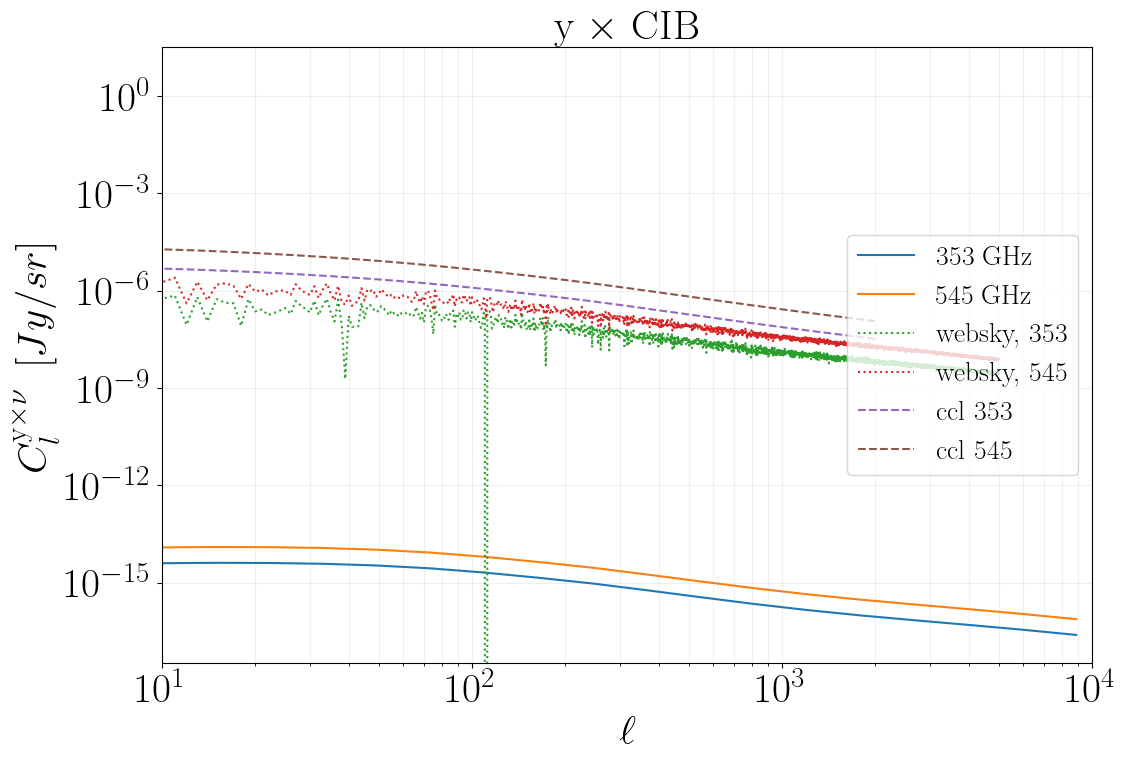

In [73]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$ C_l^{\rm{y \times \nu}} \,\,\, [Jy/sr]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'y $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")
plt.xlim(10, 10000) 

# class-sz
ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi
for (i,nu) in enumerate(nu_list):
    cl_yCIB_1h = np.asarray(cl_tsz_cib[str(nu)]['1h'])
    cl_yCIB_2h = np.asarray(cl_tsz_cib[str(nu)]['2h'])
    plt.plot(ell_tsz_cib, (cl_yCIB_1h+cl_yCIB_2h)/cls_to_dls, '-',label=r' %.1i GHz'%(nu))

#websky 1e6 for from maps(MJy) to Jensky, 1e6 for y units in class-sz
#plt.plot(1e6*ws_ycib217, ":", label=r'websky, 217')
plt.plot(1e6*ws_ycib353, ":", label=r'websky, 353')
plt.plot(1e6*ws_ycib545, ":", label=r'websky, 545')
# plt.plot(1e12*ws_ycib217/convert_Jysr_to_uK(217), ":", label=r'websky, 217')
# plt.plot(1e12*ws_ycib353/convert_Jysr_to_uK(353), ":", label=r'websky, 353')
# plt.plot(1e12*ws_ycib545/convert_Jysr_to_uK(545), ":", label=r'websky, 545')

#ccl 
plt.loglog(ells_ccl, cl_ccl['y-c'],"--",label=r'ccl 353')
plt.loglog(ells_ccl2, cl_ccl2['y-c'],"--", label=r'ccl 545')
plt.legend(loc='right',  fontsize=20)    
  


In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{\rm{y \times \nu}} / 2 \pi  \ \ [\mu K^2]$", fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'$|$ tSZ $\times$ CIB $|$', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")

ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    cl_yCIB_1h = np.asarray(cl_tsz_cib[str(nu)]['1h']) /convert_Jysr_to_uK(nu)
    cl_yCIB_2h = np.asarray(cl_tsz_cib[str(nu)]['2h']) /convert_Jysr_to_uK(nu)
    plt.plot(ell_tsz_cib, (cl_yCIB_1h+cl_yCIB_2h)*abs(tSZ_spectral_funct_at_nu_in_GHz(nu)),'-',label=r' %.1i GHz'%(nu))

plt.legend(loc='right',  fontsize=20)    
  


# correlation coefficients 

eq. 38 in https://arxiv.org/pdf/2006.16329.pdf

corr 

## CIB x tSZ

I am ignoring all the CIB unit conversions and tSZ spectral fuction because it would cancel anyway

In [ ]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('CIB x tSZ', fontsize=30)

for (i,nu) in enumerate(nu_list):  
    ## tSZ
    tsz_tsz = yy
      
    ## CIB
    cls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])
    cls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    CIB = (cls_cib_1h+cls_cib_2h) 
  
    #tSZ x CIB 
    ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
    cl_y_cib_1h = np.asarray(cl_tsz_cib[str(nu)]['1h'])
    cl_y_cib_2h = np.asarray(cl_tsz_cib[str(nu)]['2h'])
    CIBy = (cl_y_cib_1h+cl_y_cib_2h)
    
    #correlation coeff
    corr = CIBy/np.sqrt(CIB*yy)   
    plt.plot(ell_tsz_cib, corr, label = "%.1i GHZ"%(nu))
    
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

 